### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
# Lista dos dados e nomes das lojas
dados_lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ['loja1', 'loja2', 'loja3', 'loja4']
faturamentos = {}

for nome, df in zip(nomes_lojas, dados_lojas):
    faturamentos[nome] = df['Preço'].sum()

# Exibindo o faturamento de cada loja
for loja, valor in faturamentos.items():
    print(f'Faturamento {loja}: R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))

Faturamento loja1: R$ 1.534.509,12
Faturamento loja2: R$ 1.488.459,06
Faturamento loja3: R$ 1.464.025,03
Faturamento loja4: R$ 1.384.497,58


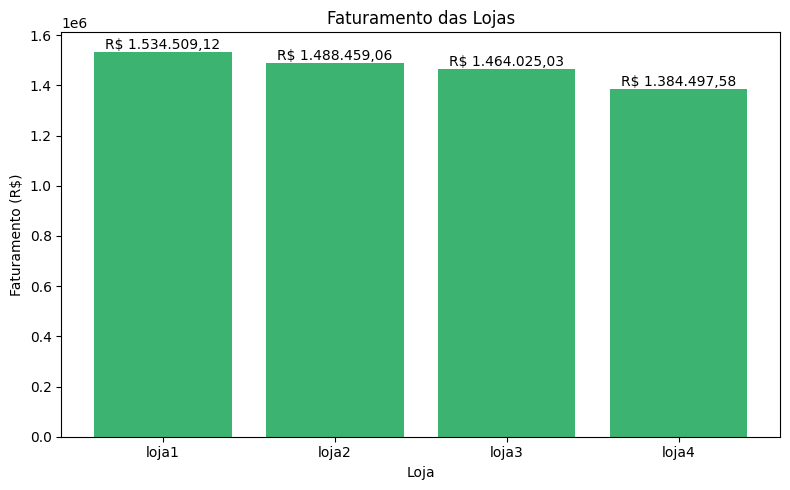

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
bars = plt.bar(faturamentos.keys(), faturamentos.values(), color='mediumseagreen')
plt.title('Faturamento das Lojas')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.tight_layout()

# Adiciona os valores no topo das barras
for bar, valor in zip(bars, faturamentos.values()):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.show()

# 2. Vendas por Categoria


In [ ]:
# Calcula o agrupamento e soma por categoria para cada loja usando list comprehension
cats = [df.groupby('Categoria do Produto')['Preço'].sum() for df in dados_lojas]

# Concatena os resultados em um único DataFrame, alinhando pelo índice (categoria)
df_categorias = pd.concat(cats, axis=1)
df_categorias.columns = nomes_lojas
df_categorias = df_categorias.fillna(0)

# Ordena pelo total de vendas (opcional)
df_categorias = df_categorias.loc[df_categorias.sum(axis=1).sort_values(ascending=False).index]

# Formata os valores em reais usando apply + map para evitar o aviso de deprecated
df_categorias_formatado = df_categorias.apply(
    lambda col: col.map(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
)

# Exibe o DataFrame formatado
from IPython.display import display
display(df_categorias_formatado)


,loja1,loja2,loja3,loja4
Categoria do Produto,,,,
eletronicos,"R$ 572.659,23","R$ 547.773,71","R$ 547.699,92","R$ 545.966,86"
eletrodomesticos,"R$ 484.913,36","R$ 464.758,13","R$ 438.984,89","R$ 377.680,65"
moveis,"R$ 250.178,11","R$ 235.234,68","R$ 268.095,56","R$ 256.705,65"
instrumentos musicais,"R$ 121.731,69","R$ 139.987,03","R$ 103.174,45","R$ 100.136,50"
esporte e lazer,"R$ 52.387,55","R$ 46.326,09","R$ 47.456,10","R$ 44.465,65"
brinquedos,"R$ 23.993,78","R$ 21.262,21","R$ 25.869,20","R$ 27.015,67"
utilidades domesticas,"R$ 16.931,48","R$ 19.662,86","R$ 20.080,21","R$ 20.098,83"
livros,"R$ 11.713,92","R$ 13.454,35","R$ 12.664,70","R$ 12.427,77"


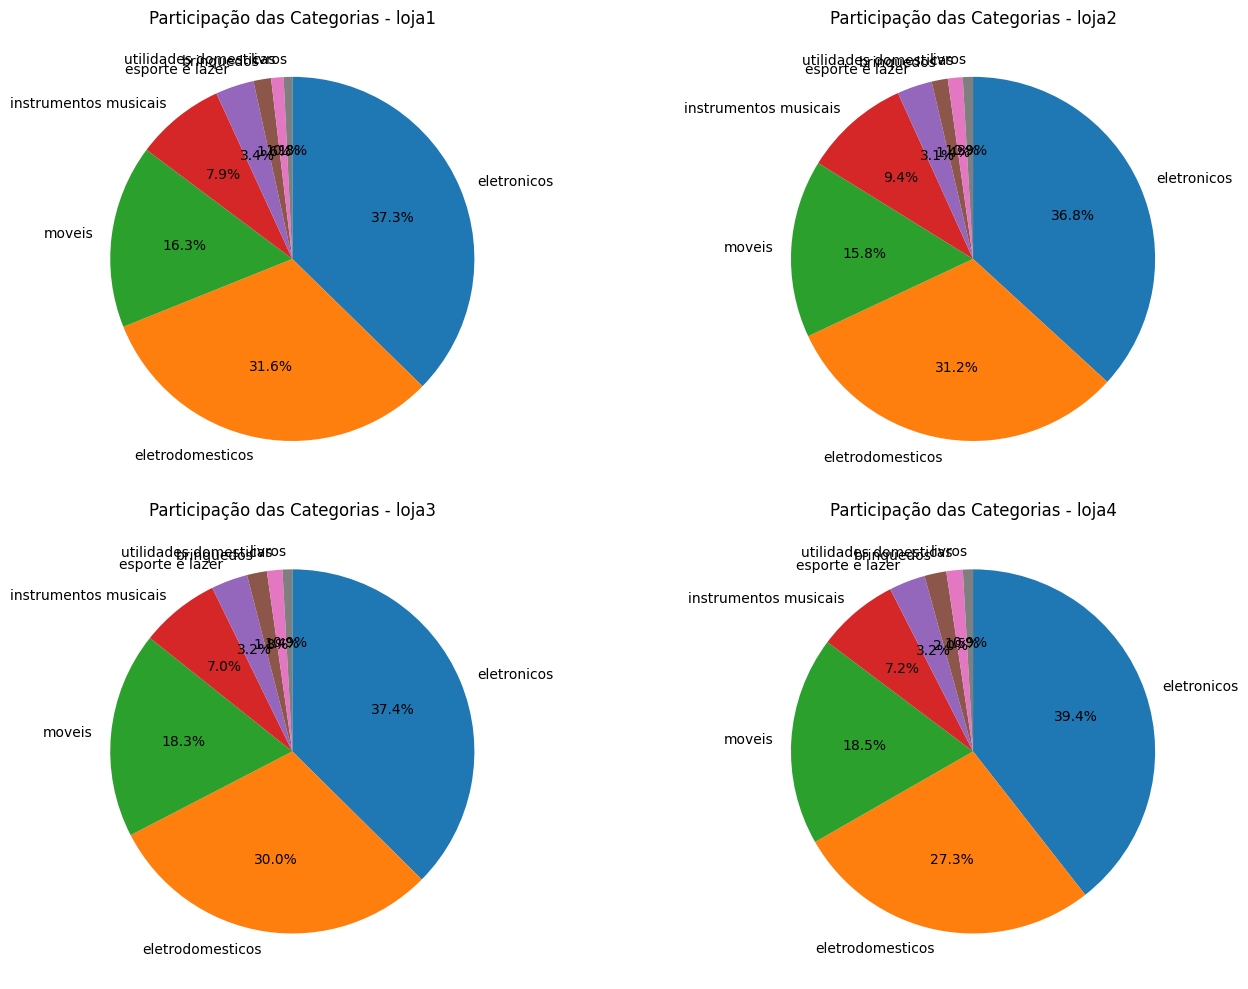

In [ ]:
# Usa diretamente os valores numéricos
df_plot = df_categorias  # já contém os valores numéricos corretos

lojas = df_plot.columns
categorias = df_plot.index

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for ax, loja in zip(axs.flatten(), lojas):
    valores = df_plot[loja]
    ax.pie(
        valores,
        labels=categorias,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    ax.set_title(f'Participação das Categorias - {loja}')

plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [ ]:
# Calcula a média das avaliações para cada loja
medias_avaliacao = [
    df['Avaliação da compra'].mean()  # Calcula a média diretamente do DataFrame
    for df in dados_lojas  # Itera sobre as lojas
]

# Exibe o resultado
for nome, media in zip(nomes_lojas, medias_avaliacao):
    print(f"Média de avaliação {nome}: {media:.2f}")

Média de avaliação loja1: 3.98
Média de avaliação loja2: 4.04
Média de avaliação loja3: 4.05
Média de avaliação loja4: 4.00


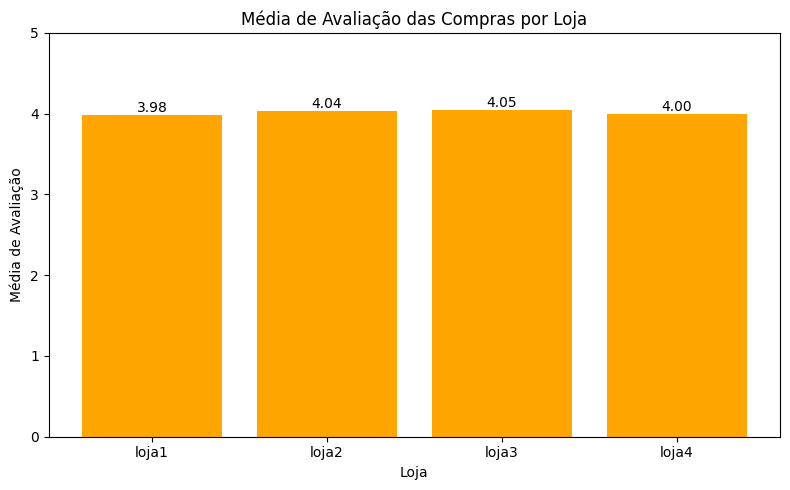

In [ ]:
# Define o tamanho da figura
plt.figure(figsize=(8, 5))

# Cria as barras do gráfico com as médias de avaliação
bars = plt.bar(nomes_lojas, medias_avaliacao, color='orange')

# Título e rótulos dos eixos
plt.title('Média de Avaliação das Compras por Loja')
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')
plt.ylim(0, 5)  # Limita a escala do eixo Y de 0 a 5
plt.tight_layout()

# Adiciona os valores no topo das barras
for bar, valor in zip(bars, medias_avaliacao):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posição X centralizada na barra
        bar.get_height(),  # Posição Y no topo da barra
        f'{valor:.2f}',  # Exibe o valor com duas casas decimais
        ha='center',  # Alinha o texto horizontalmente no centro
        va='bottom',  # Alinha o texto verticalmente acima da barra
        fontsize=10
    )

# Exibe o gráfico
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [ ]:
# Conta quantas vezes cada produto aparece em cada loja (cada linha = 1 unidade vendida)
produtos_por_loja = [df['Produto'].value_counts() for df in dados_lojas]

# Soma total de produtos vendidos (todas as lojas)
produtos_total = sum(produtos_por_loja).groupby('Produto').sum() if len(produtos_por_loja) > 1 else produtos_por_loja[0]

# Função para obter mais e menos vendidos
def mais_menos_vendidos(produtos):
    return produtos.idxmax(), produtos.max(), produtos.idxmin(), produtos.min()

# Exibe mais e menos vendidos no total
mais_nome, mais_qtd, menos_nome, menos_qtd = mais_menos_vendidos(produtos_total)
print(f"Produto mais vendido (total): {mais_nome} - {mais_qtd} unidades")
print(f"Produto menos vendido (total): {menos_nome} - {menos_qtd} unidades\n")

# Exibe mais e menos vendidos por loja
for nome, produtos_loja in zip(nomes_lojas, produtos_por_loja):
    mais_nome, mais_qtd, menos_nome, menos_qtd = mais_menos_vendidos(produtos_loja)
    print(f"{nome}:")
    print(f"  Produto mais vendido: {mais_nome} - {mais_qtd} unidades")
    print(f"  Produto menos vendido: {menos_nome} - {menos_qtd} unidades\n")


Produto mais vendido (total): Cômoda - 210 unidades
Produto menos vendido (total): Celular ABXY - 157 unidades

loja1:
  Produto mais vendido: Micro-ondas - 60 unidades
  Produto menos vendido: Headset - 33 unidades

loja2:
  Produto mais vendido: Iniciando em programação - 65 unidades
  Produto menos vendido: Jogo de tabuleiro - 32 unidades

loja3:
  Produto mais vendido: Kit banquetas - 57 unidades
  Produto menos vendido: Blocos de montar - 35 unidades

loja4:
  Produto mais vendido: Cama box - 62 unidades
  Produto menos vendido: Guitarra - 33 unidades



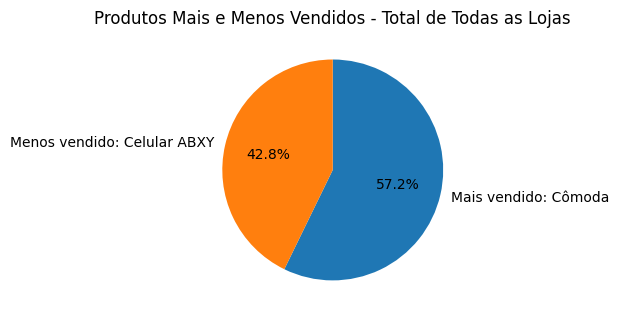

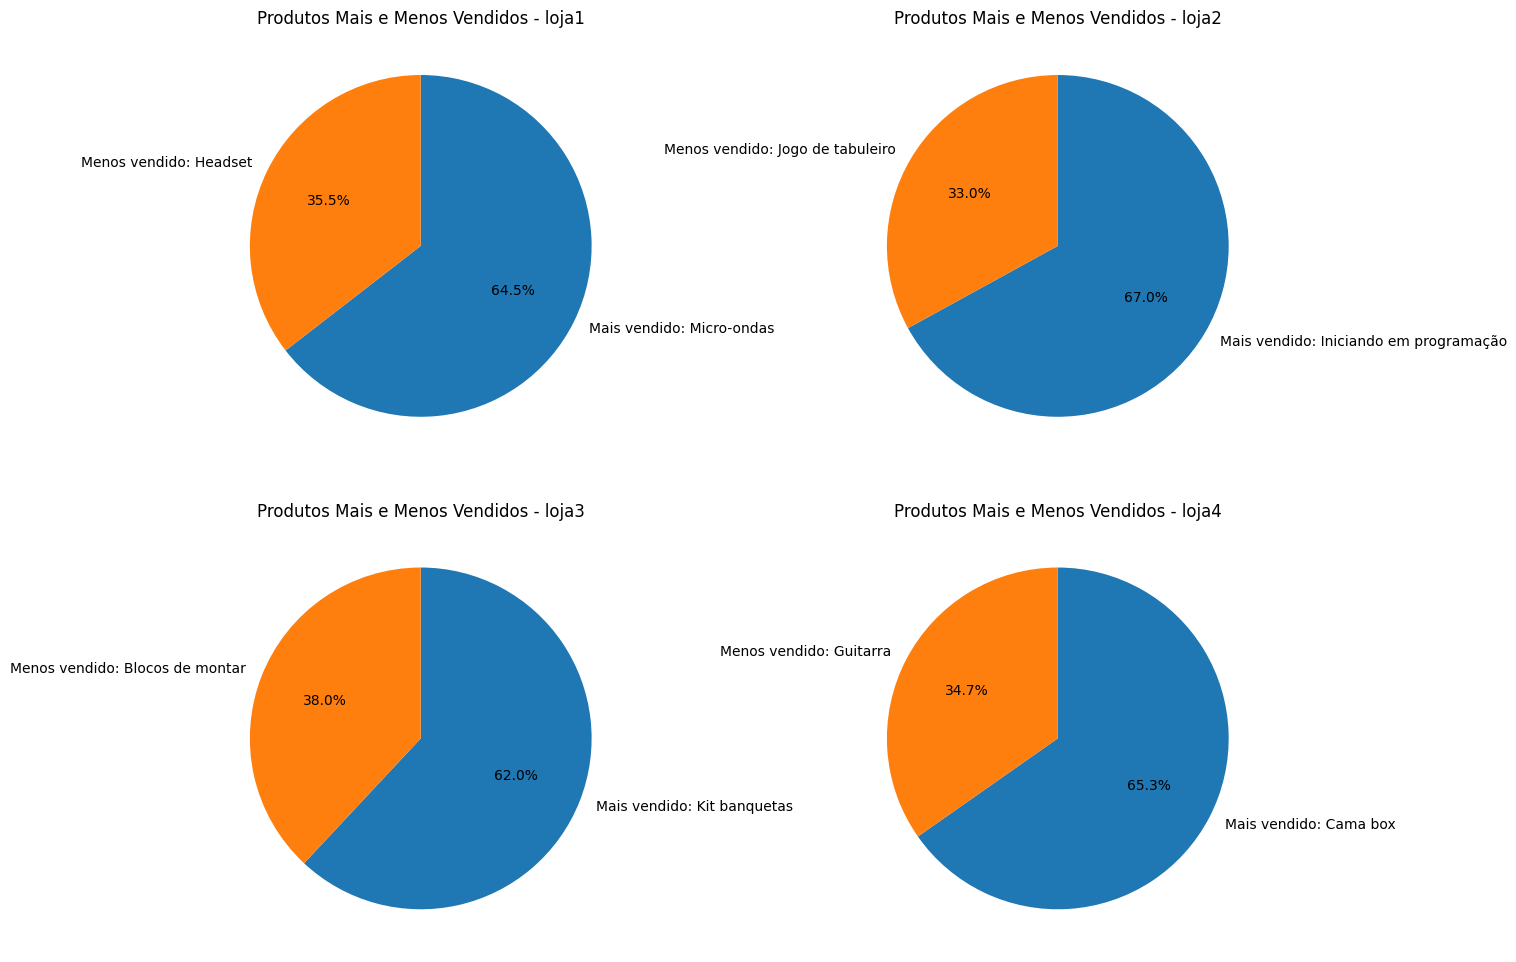

In [ ]:
import matplotlib.pyplot as plt

# Função para obter mais e menos vendidos
def mais_menos_vendidos(produtos):
    return produtos.idxmax(), produtos.max(), produtos.idxmin(), produtos.min()

# Função para preparar dados para o gráfico de pizza (apenas mais e menos vendidos)
def dados_pizza(produtos):
    mais_nome, mais_qtd, menos_nome, menos_qtd = mais_menos_vendidos(produtos)
    valores = [mais_qtd, menos_qtd]
    labels = [f'Mais vendido: {mais_nome}', f'Menos vendido: {menos_nome}']
    return valores, labels

# Gráfico de pizza para o total de todas as lojas
valores_total, labels_total = dados_pizza(produtos_total)
plt.figure(figsize=(6, 6))
plt.pie(valores_total, labels=labels_total, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Produtos Mais e Menos Vendidos - Total de Todas as Lojas')
plt.tight_layout()
plt.show()

# Gráfico de pizza para cada loja
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Ajuste para 2x2 subplots
for ax, nome, produtos_loja in zip(axs.flatten(), nomes_lojas, produtos_por_loja):
    valores, labels = dados_pizza(produtos_loja)
    ax.pie(valores, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False)
    ax.set_title(f'Produtos Mais e Menos Vendidos - {nome}')
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [ ]:
# Calcula a média do frete para cada loja (usando list comprehension)
medias_frete = [df['Frete'].mean() for df in dados_lojas]

# Exibe as médias formatadas
print(f"{'Loja':<8} | {'Média do Frete':>18}")
print("-" * 30)
[
    print(f"{loja:<8} | R$ {media:15,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
    for loja, media in zip(nomes_lojas, medias_frete)
]


Loja     |     Média do Frete
------------------------------
loja1    | R$           34,69
loja2    | R$           33,62
loja3    | R$           33,07
loja4    | R$           31,28


[None, None, None, None]

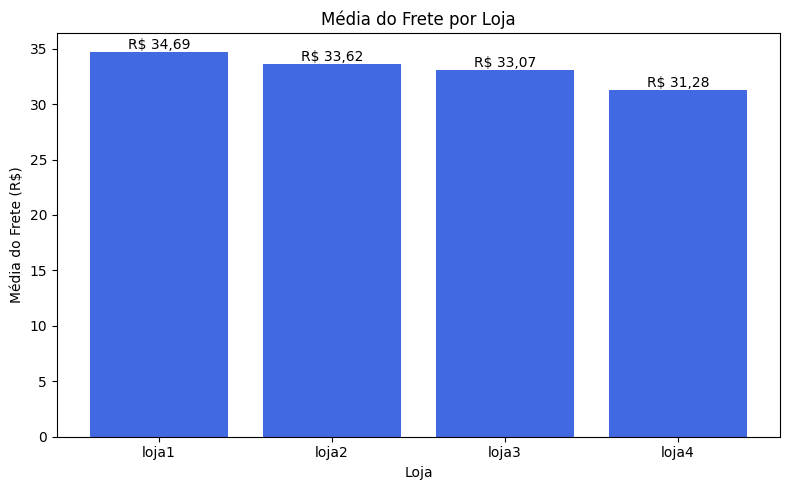

In [ ]:
# Gráfico de barras com anotações
plt.figure(figsize=(8, 5))
bars = plt.bar(nomes_lojas, medias_frete, color='royalblue')
plt.title('Média do Frete por Loja')
plt.xlabel('Loja')
plt.ylabel('Média do Frete (R$)')
plt.tight_layout()

# Adicionando as anotações nas barras
[
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posição central na barra
        bar.get_height(),  # Posição no topo da barra
        f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),  # Formatação monetária
        ha='center',  # Alinhamento horizontal ao centro
        va='bottom',  # Alinhamento vertical ao topo da barra
        fontsize=10
    )
    for bar, valor in zip(bars, medias_frete)
]

plt.show()

# 6. Relatório Final

Relatório comparativo com os principais indicadores:

Loja	Total de Vendas	        Faturamento Total (R$)	Média de Preço (R$)	    Média do Frete (R$)	    Nota Média de Avaliação
Loja 1	           2359	            1.534.509,12	           650,49	            34,69	                 3,98
Loja 2	           2359	            1.488.459,06	           630,97	            33,62	                 4,04
Loja 3	           2359	            1.464.025,03	           620,61	            33,07	                 4,05
Loja 4	           2358	            1.384.497,58	           587,15	            31,28	                 4,00

Conclusão: Loja que deve ser fechada
Loja 4 apresenta os piores resultados financeiros:

Menor faturamento total

Menor preço médio
Menor volume de vendas (mesmo que por apenas 1 venda)
Avaliação média inferior à da Loja 3 e Loja 2
Apesar de ter o frete mais barato e uma nota razoável, o desempenho comercial é o mais fraco.
